# Importing libraries

In [53]:
import codecs
import re
import pandas as pd
import emoji as emj

### Reading file 

In [91]:
file = 'D:\Dev\Machine Learning Projects\Chat Analyzer\WhatsApp.txt'
e_types = ["utf8", "cp1252"]
for encoding in e_types:
    with codecs.open(file, encoding = encoding, errors = 'replace') as f:
        data = f.read()
        data = ' '.join(data.split('\n'))

### DateTime and message splitting 

In [92]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'
msg = re.split(pattern, data)[1:]
date = re.findall(pattern, data)

### Create Dataframe

In [93]:
df = pd.DataFrame({
    'user_messages': msg,
    'date': date
})


### Seprate message and username

In [94]:
user = []
messages = []
for message in df['user_messages']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        user.append(entry[1])
        messages.append(entry[2])
        
    else:
        user.append('group_notification')
        messages.append(entry[0])
              
df['user'] = user
df['messages'] = messages
df.drop(columns = ['user_messages'], inplace = True)

df.tail() 

,date,user,messages
39994,"31/05/21, 14:49 -",nihal (divine),Aao @917607534265
39995,"31/05/21, 14:51 -",Neta Jii,Lunth @917607534265
39996,"31/05/21, 14:58 -",Roshan,à¤…à¤°à¥‡ à¤šà¤¾à¤°à¥�à¤œ à¤¨à¤¹à¥€à¤‚ à¤¹à¥ˆà¥¤
39997,"31/05/21, 14:58 -",Roshan,à¤…à¤­à¥€ à¤•à¥‹ à¥ªà¥¦ à¤¹à¥�à¤† à¤¹à¥ˆà¥¤
39998,"31/05/21, 15:15 -",Roshan,<Media omitted>


In [95]:
image = df[df['messages'] ==  '<Media omitted> ']
print(len(image))

6889


### Cleaning Data 

In [98]:
image = df[df['messages'] ==  '<Media omitted> ']
print(len(image))
#df.drop(image.index, inplace = True)

notification = df[df['user'] == 'group_notification']
len_notification = len(notification)
df.drop(notification.index, inplace = True)

df.reset_index(inplace = True, drop = True)
#
df.tail()

6889


,date,user,messages
39809,"31/05/21, 14:49 -",nihal (divine),Aao @917607534265
39810,"31/05/21, 14:51 -",Neta Jii,Lunth @917607534265
39811,"31/05/21, 14:58 -",Roshan,à¤…à¤°à¥‡ à¤šà¤¾à¤°à¥�à¤œ à¤¨à¤¹à¥€à¤‚ à¤¹à¥ˆà¥¤
39812,"31/05/21, 14:58 -",Roshan,à¤…à¤­à¥€ à¤•à¥‹ à¥ªà¥¦ à¤¹à¥�à¤† à¤¹à¥ˆà¥¤
39813,"31/05/21, 15:15 -",Roshan,<Media omitted>


In [99]:
df.groupby('user')['messages'].count().sort_values(ascending = False)

user
Neta Jii             9464
nihal (divine)       9104
Roshan               6290
amit (divine)        4123
Aditya (Alooo)       4059
Sudhanshu Bhabhi     2238
+91 84001 31805      1445
RAJAT SRIVASTAVA     1386
Aditya Pathak         789
shivansh (kota)       529
manish (Kota)         303
raj(roshan frnd)       83
Harikesh (Divine)       1
Name: messages, dtype: int64

# Most active User 

<AxesSubplot:xlabel='user'>

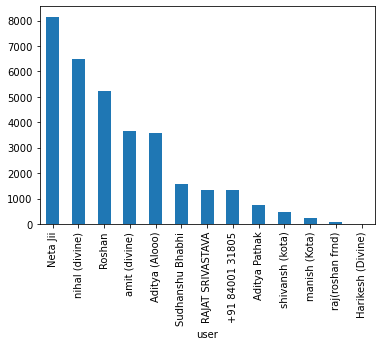

In [89]:
df.groupby('user')['messages'].count().sort_values(ascending = False).plot(kind = "bar")

# Most Used Word 

In [8]:
from collections import Counter
all_words = ' '
count = Counter()
for msg in df['messages'].values:
    words = str(msg).lower()
    all_words = all_words + str(words) + ' '
        
count.update(all_words.split())

common_word = ['hai', 'ke', 'ho', 'ka', 'to', 'me', 'se', 'bhi', 'ko', 'nhi', 'nahi', 'hi', 'ki', 'h', 'rhe', 
               'tha', 'ye', 'the', 'tm', 'aa', 'do', 'be', 'rha', 'tum', 'kar', 'ha', 'hm', 'kr', 'kya','toh']
for w in common_word:
    del count[w]
    
count.most_common(10)

[('bhai', 2209),
 ('@919935027908', 1695),
 ('@919936350601', 1232),
 ('@917607534265', 1049),
 ('aao', 1013),
 ('abe', 998),
 ('bsdk', 968),
 ('@919198541932', 806),
 ('amit', 793),
 ('ek', 691)]

In [52]:
gali = ['bahinchod', 'bhaduachod', 'betichod', 'chutiya', 'madharchod', 'bhosadi', 'chut', 'bsdk', 'bhosada', 'bhosda', '<Media omitted>']
for g in gali:
    print(str(g) + "    :    " + str(count[g]))

bahinchod    :    25
bhaduachod    :    52
betichod    :    259
chutiya    :    257
madharchod    :    113
bhosadi    :    244
chut    :    235
bsdk    :    968
bhosada    :    25
bhosda    :    125
<Media omitted>    :    0


# Time 

Text(0, 0.5, 'messages')

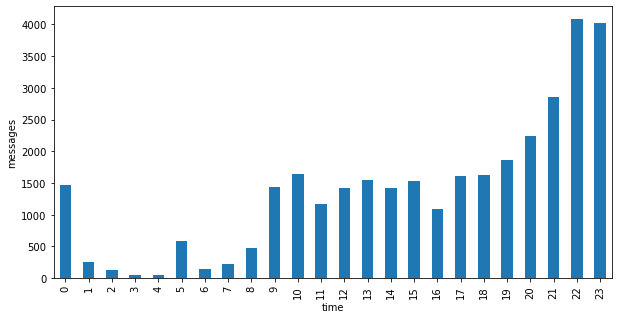

In [10]:
import pandas as pd
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y, %H:%M - ')
df['hour'] = df['date'].apply(lambda x: x.hour)
g = df.groupby(['hour']).size().sort_index().plot(kind = 'bar', figsize = (10, 5))
g.set_xlabel("time")
g.set_ylabel("messages")

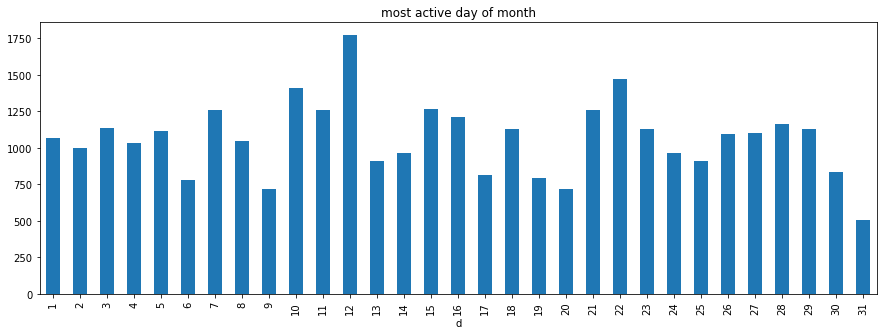

In [11]:
df['d'] = df['date'].apply(lambda x: x.day)
g = df.groupby(['d']).size().sort_index().plot(kind = "bar", figsize = (15,5), title = "most active day of month")

<AxesSubplot:title={'center':'most active day'}, xlabel='day'>

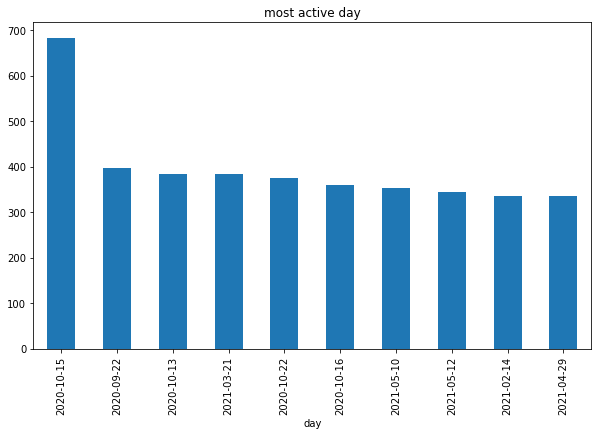

In [12]:
df['day'] = df['date'].apply(lambda x: x.date())
date = df.groupby(['day']).size().sort_values(ascending = False)
date[:10].plot(kind = "bar", figsize = (10,6), title = "most active day")

<AxesSubplot:title={'center':'most active day of week'}, xlabel='weekday'>

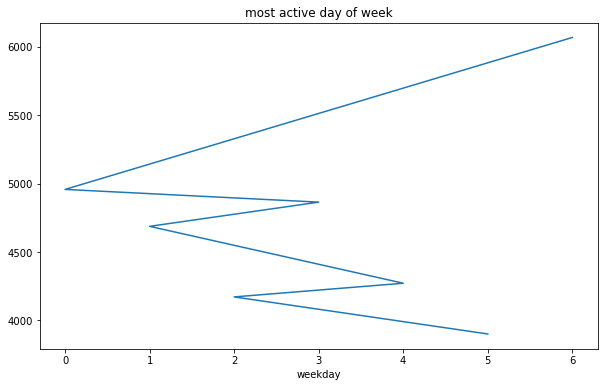

In [13]:
df['weekday'] = df['date'].apply(lambda x: x.date().weekday())
weekday = df.groupby(['weekday']).size().sort_values()
weekday.plot(kind = "line", figsize = (10,6), title = "most active day of week")

In [27]:
emoji = []
em = df['messages'].apply(str)
for e in em:
    if e in emj.UNICODE_EMOJI_ALIAS_ENGLISH:
        emoji.append(e)
        
print(e)

à¤…à¤­à¥€ à¤•à¥‹ à¥ªà¥¦ à¤¹à¥�à¤† à¤¹à¥ˆà¥¤ 
